In [69]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [24]:
df = pd.read_csv("data.csv")
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [25]:
df.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [26]:
df.shape

(2000, 16)

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(1918, 16)

In [29]:
df.isna().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1918 non-null   int64  
 1   customer_id             1918 non-null   int64  
 2   phone_no                1918 non-null   object 
 3   gender                  1918 non-null   object 
 4   age                     1918 non-null   int64  
 5   no_of_days_subscribed   1918 non-null   int64  
 6   multi_screen            1918 non-null   object 
 7   mail_subscribed         1918 non-null   object 
 8   weekly_mins_watched     1918 non-null   float64
 9   minimum_daily_mins      1918 non-null   float64
 10  maximum_daily_mins      1918 non-null   float64
 11  weekly_max_night_mins   1918 non-null   int64  
 12  videos_watched          1918 non-null   int64  
 13  maximum_days_inactive   1918 non-null   float64
 14  customer_support_calls  1918 non-null   

In [31]:
df.drop(columns = ["phone_no","customer_id"],inplace=True)

In [42]:
categorical_column = ['gender', 'multi_screen', 'mail_subscribed']
data_encoded = df.copy(deep=True)#deep copying
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df[col])#column names keeping same
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))#automatic labeling
        print('Feature', col)#printing All 
        print('mapping', le_name_mapping)

Feature gender
mapping {'Female': 0, 'Male': 1}
Feature multi_screen
mapping {'no': 0, 'yes': 1}
Feature mail_subscribed
mapping {'no': 0, 'yes': 1}


In [43]:
data_encoded.head()

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


<AxesSubplot:>

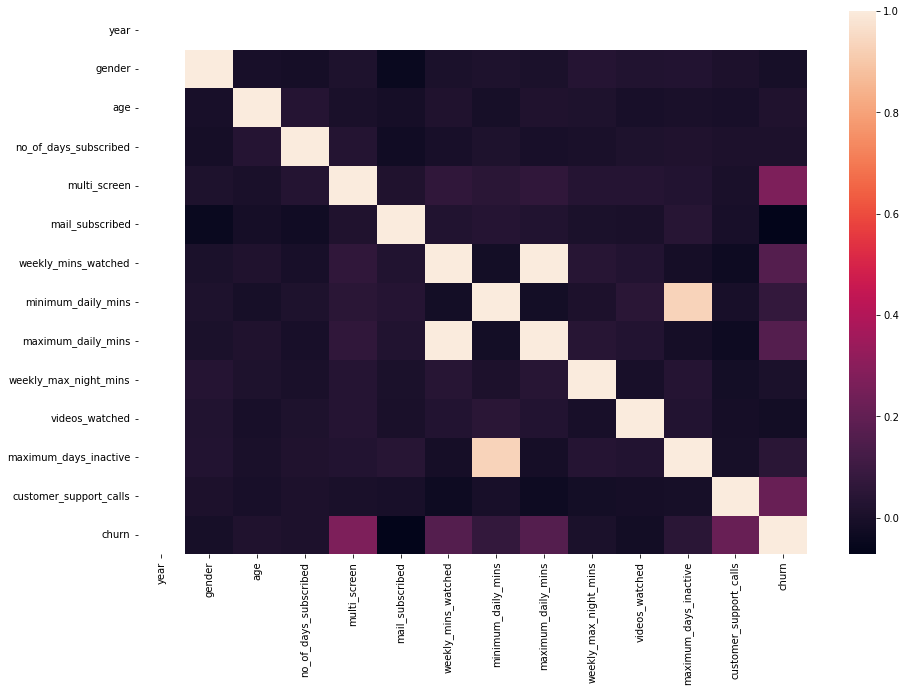

In [44]:
data_correlation = data_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]#corellation graph
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

In [45]:
data_encoded.drop(columns = ["year","gender","mail_subscribed","videos_watched"],inplace=True)# as they are zero correlated

In [47]:
data_encoded.head()

,age,no_of_days_subscribed,multi_screen,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,maximum_days_inactive,customer_support_calls,churn
0,36,62,0,148.35,12.2,16.81,82,4.0,1,0.0
1,39,149,0,294.45,7.7,33.37,87,3.0,2,0.0
2,65,126,0,87.30,11.9,9.89,91,4.0,5,1.0
3,24,131,0,321.30,9.5,36.41,102,3.0,3,0.0
4,40,191,0,243.00,10.9,27.54,83,3.0,1,0.0


In [48]:
# Model Building

In [51]:
X = data_encoded.drop(columns=["churn"])
y = data_encoded["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Decision Tree

In [60]:
dtree = tree.DecisionTreeClassifier(max_leaf_nodes=40,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=40, random_state=0)

In [61]:
predicted_output=dtree.predict(X_test)
pred=list(predicted_output)

In [62]:
dtree.score(X_test,y_test)

0.90625

In [63]:
print(classification_report( pred,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       359
         1.0       0.36      0.56      0.44        25

    accuracy                           0.91       384
   macro avg       0.66      0.75      0.69       384
weighted avg       0.93      0.91      0.92       384



In [70]:
# Random Forest 
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X_train,y_train)

In [71]:
predicted_output=clf.predict(X_test)
pred=list(predicted_output)

In [72]:
clf.score(X_test,y_test)

0.8984375

In [73]:
print(classification_report( pred,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       350
         1.0       0.44      0.50      0.47        34

    accuracy                           0.90       384
   macro avg       0.69      0.72      0.70       384
weighted avg       0.91      0.90      0.90       384

